In [6]:
%matplotlib inline
import random
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal

(array([0.00069981, 0.00279923, 0.00139961, 0.00209942, 0.00699807,
        0.01469596, 0.02099422, 0.02659268, 0.0286921 , 0.04338806,
        0.05178575, 0.05598459, 0.07417959, 0.08257727, 0.10147207,
        0.13086399, 0.1413611 , 0.14905898, 0.17075301, 0.19664588,
        0.18614877, 0.21134184, 0.1980455 , 0.1791507 , 0.17845089,
        0.1987453 , 0.16655416, 0.1511584 , 0.1420609 , 0.13016418,
        0.09937265, 0.07627901, 0.06228286, 0.05178575, 0.04408787,
        0.0279923 , 0.02449326, 0.01819499, 0.01399615, 0.00489865,
        0.01119692, 0.00629827, 0.00489865, 0.00139961, 0.00139961,
        0.00349904, 0.00139961, 0.        , 0.        , 0.00069981]),
 array([-3.24680546, -2.96101254, -2.67521963, -2.38942671, -2.1036338 ,
        -1.81784088, -1.53204797, -1.24625506, -0.96046214, -0.67466923,
        -0.38887631, -0.1030834 ,  0.18270952,  0.46850243,  0.75429535,
         1.04008826,  1.32588118,  1.61167409,  1.89746701,  2.18325992,
         2.46905284,  2.75

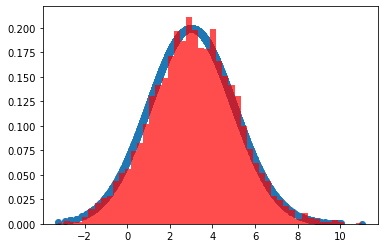

In [7]:
# MH
def norm_dist_prob(theta):
    y = norm.pdf(theta, loc=3, scale=2)
    return y

T = 5000
pi = [0 for i in range(T)]
sigma = 1 # 方差
t = 0
while t < T-1:
    t = t + 1
    pi_star = norm.rvs(loc=pi[t - 1], scale=sigma, size=1, random_state=None)

    #转移矩阵对称的情形
    alpha = min(1, (norm_dist_prob(pi_star[0]) / norm_dist_prob(pi[t - 1])))

    u = random.uniform(0, 1)
    if u < alpha:
        pi[t] = pi_star[0]
    else:
        pi[t] = pi[t - 1]


plt.scatter(pi, norm.pdf(pi, loc=3, scale=2))
num_bins = 50
plt.hist(pi, num_bins, density=1, stacked=True, facecolor='red', alpha=0.7)

Text(0.5, 1.0, 'Gibbs Sampler')

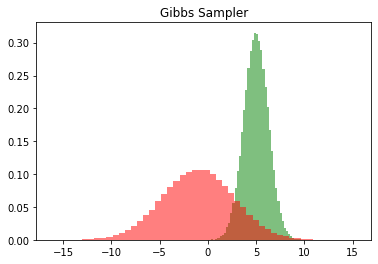

In [9]:
# https://shunliz.gitbooks.io/machine-learning/content/math/probability/gibbs.html
"""
由于Gibbs采样在高维特征时的优势，目前我们通常意义上的MCMC采样都是用的Gibbs采样。
当然Gibbs采样是从M-H采样的基础上的进化而来的，
同时Gibbs采样要求数据至少有两个维度，一维概率分布的采样是没法用Gibbs采样的,这时M-H采样仍然成立。
"""
samplesource = multivariate_normal(mean=[5,-1], cov=[[1,1],[1,4]])

def p_ygivenx(x, m1, m2, s1, s2):
    return (random.normalvariate(m2 + rho * math.sqrt(s2 / s1) * (x - m1), math.sqrt(1 - rho ** 2) * s2))

def p_xgiveny(y, m1, m2, s1, s2):
    return (random.normalvariate(m1 + rho * math.sqrt(s1 / s2) * (y - m2), math.sqrt(1 - rho ** 2) * s1))

N = 5000
K = 20
x_res = []
y_res = []
z_res = []
m1 = 5
m2 = -1
s1 = 1
s2 = 4

rho = 0.5
y = m2

for i in range(N):
    for j in range(K):
        x = p_xgiveny(y, m1, m2, s1, s2)
        y = p_ygivenx(x, m1, m2, s1, s2)
        z = samplesource.pdf([x,y])
        x_res.append(x)
        y_res.append(y)
        z_res.append(z)

# 两个特征各自的分布如下：
num_bins = 50
plt.hist(x_res, num_bins, density=1, stacked=True, facecolor='green', alpha=0.5)
plt.hist(y_res, num_bins, density=1, stacked=True, facecolor='red', alpha=0.5)
plt.title('Gibbs Sampler')

<ipython-input-10-67d41d121f8d>:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)


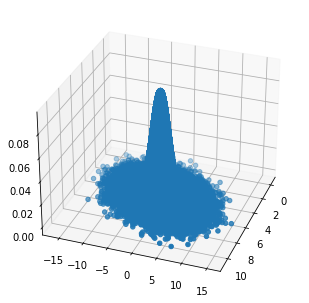

In [10]:
# 样本集生成的二维正态分布
fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=30, azim=20)
ax.scatter(x_res, y_res, z_res,marker='o')